# Assignment 3
## JuPyter Notebook - Verschuur L. 1811053, Kolenbrander M. 1653415

In [2]:
## Parameters

# Convert numeric values into ranged representations
convert_to_range = True
# Represent ranges as categorical values or rounded to nearest base value: 12, b=5 -> 10-14
range_categorical = False
# Convert categorical values (not from ranged values) into one hot representations:
# {'smoking': ['sometimes', 'regularly', 'sometimes', 'never']} -> 
# {'smoking_sometimes': [1, 0, 1, 0], 'smoking_regularly': [0, 1, 0, 0], 'smoking_never': [0, 0, 0, 1]}
convert_categorical_to_one_hot = True

## Utility functions

In [3]:
import math

def round_to_base(in_val, base):
    """
    Round the in_val value to the nearest base.
    E.g. base 5
        2  -> 0
        9  -> 10
        12 -> 10
        13 -> 15
    
    :param in_val: Value to round
    :param base: Base to round to
    :return: Rounded value
    """
    
    return round(in_val/base) * base

def floor_range(in_val, range_val):
    """
    Floor the in_val value to the nearest base (range_val). 
    And then indicate a range.
    E.g. base 5
        2  -> 0 - 4
        9  -> 5 - 9
        12 -> 10 - 14
        13 -> 10 - 14
    
    :param in_val: Value to round
    :param range_val: Range to floor to
    :return: Rounded value range
    """
    
    floored_val = math.floor(in_val/range_val) * range_val
    
    return f"{floored_val} - {floored_val + range_val - 1}"


In [4]:
def find_column_names(df, find_column_name):
    """
    Find all columns in a dataframe based on a prefix (find_column_name) and return as a list.
    E.g. columns: ["a_a", "a_b", "b_a", "c"] and find_column_name: "a"
        ["a_a", "a_b"]
    
    :param df: Input data frame
    :param find_column_name: Prefix of column name
    :return: Rounded value range
    """
    
    return [column_name for column_name in df.columns if f"{find_column_name}_" in column_name ]

def fetch_columns_on_name_list(df, find_column_name_list):
    """
    Find all subsets of the prefixes provided in find_column_name_list and form a list of these.
    The columns are found with find_column_names.
    
    :param df: Input data frame
    :param find_column_name_list: List of prefix column names
    :return: Rounded value range
    """
    
    return [name for name_group in [find_column_names(df, column_name) for column_name in find_column_name_list] for name in name_group]

## Data fetching & Data pre-processing

In [6]:
import pandas as pd
import numpy as np

file_path = "healthcare-dataset-stroke-data.csv"

# Fetching CSV and converting to data frame
data_file = pd.read_csv(file_path, header=0)

# Drop all entries with nan values
data_file = data_file.dropna()

# Convert interval and ratio variables into ranges
if convert_to_range and range_categorical:
    data_file.insert(data_file.columns.get_loc("age"), "ranged_age", [floor_range(age, 10) for age in data_file["age"]])
    data_file.insert(data_file.columns.get_loc("avg_glucose_level"), "ranged_avg_glucose_level", [floor_range(avg_glucose_level, 25) for avg_glucose_level in data_file["avg_glucose_level"]])
    data_file.insert(data_file.columns.get_loc("bmi"), "ranged_bmi", [floor_range(bmi, 2) for bmi in data_file["bmi"]])
elif convert_to_range and not range_categorical:
    data_file.insert(data_file.columns.get_loc("age"), "ranged_age", [round_to_base(age, 10) for age in data_file["age"]])
    data_file.insert(data_file.columns.get_loc("avg_glucose_level"), "ranged_avg_glucose_level", [round_to_base(avg_glucose_level, 25) for avg_glucose_level in data_file["avg_glucose_level"]])
    data_file.insert(data_file.columns.get_loc("bmi"), "ranged_bmi", [round_to_base(bmi, 2) for bmi in data_file["bmi"]])

data_file.insert(data_file.columns.get_loc("bmi"), "rounded_bmi", data_file["bmi"].round(0))
    
# Convert "boolean" variables into true boolean variables
data_file["hypertension"] = data_file["hypertension"].astype("bool")
data_file["heart_disease"] = data_file["heart_disease"].astype("bool")
data_file["stroke"] = data_file["stroke"].astype("bool")
data_file["ever_married"] = np.where(data_file["ever_married"] == "Yes", True, False).astype("bool")
    
# Convert categorical variables into a one-hot representation
if convert_categorical_to_one_hot:
    data_file = pd.concat([data_file, pd.get_dummies(data_file["gender"], prefix="gender")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["work_type"], prefix="work_type")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["Residence_type"], prefix="Residence_type")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["smoking_status"], prefix="smoking_status")], axis=1)
    
data_file.head()

,id,gender,ranged_age,age,hypertension,heart_disease,ever_married,work_type,Residence_type,ranged_avg_glucose_level,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,70,67.0,False,True,True,Private,Urban,225,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80,80.0,False,True,True,Private,Rural,100,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,50,49.0,False,False,True,Private,Urban,175,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,80,79.0,True,False,True,Self-employed,Rural,175,...,0,0,1,0,1,0,0,0,1,0
5,56669,Male,80,81.0,False,False,True,Private,Urban,175,...,0,1,0,0,0,1,0,1,0,0


Beetje aankloten met PCA, kunnen zeker wat dingen uit elkaar gehaald worden maar m

0       False
1       False
2       False
3       False
4       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Name: stroke, Length: 5101, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
5104    False
5106    False
5107    False
5108    False
5109    False
Name: stroke, Length: 5101, dtype: bool


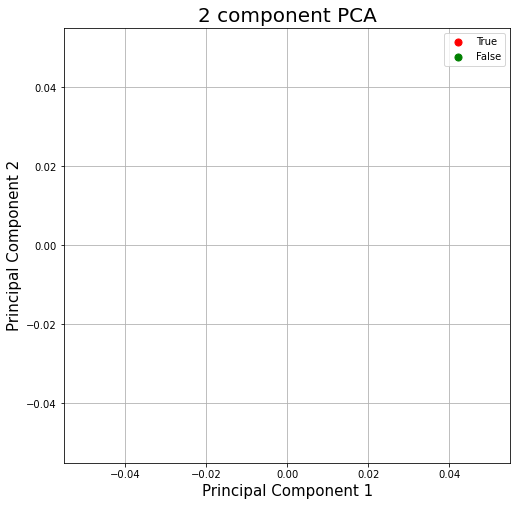

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Decision Variables
x = data_file.loc[:,["ranged_age", "hypertension", "heart_disease", "ever_married", "ranged_avg_glucose_level", "rounded_bmi", *fetch_columns_on_name_list(data_file, ["work_type"])]].values
# Target Variable
y = data_file.loc[:,"stroke"].values

x = StandardScaler().fit_transform(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
normalised_data.head()

pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(x)

principal_data_Df = pd.DataFrame(data = principalComponents_data, columns = ['principal component 1', 'principal component 2'])
target_data_DF = pd.DataFrame(data = data_file["stroke"])
#print(principal_data_Df.tail())
#print(target_data_DF.tail())

#print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

finalDf = pd.concat([principal_data_Df, target_data_DF], axis = 1)
#print(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['True', 'False']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["stroke"] == target
    print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()